# $\textbf{Assignment 2}$

## $\text{Importing Necessary Libraries}$

In [84]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt #(This may not work on Google Colab. You may open it in jupyter notebook)

UsageError: unrecognized arguments: #(This may not work on Google Colab. You may open it in jupyter notebook)


## $\text{Problem 1}$

In [85]:
def soln(t):
    return t**2 + (2/5)*t + (2/25)

In [86]:
def func(t,y):
    return (5*y) - (5*(t**2))

In [87]:
def euler(x,i1,function):
    y = np.zeros(len(x))
    h = x[1] - x[0]

    y[0] = i1

    for i in range(len(x)-1):
        y[i+1] = y[i] + (h*(function(x[i],y[i])))

    return y

In [88]:
def rk2(x,i1,function):
    y = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1

    for i in range(len(x)-1):
        k1 = h*function(x[i],y[i])
        k2 = h*function(x[i] + (0.5*h),y[i] + (0.5*k1))

        y[i+1] = y[i] + k2

    return y

In [89]:
def rk4(x,i1,function):
    y = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1

    for i in range(len(x)-1):
        k1 = h*function(x[i],y[i])
        k2 = h*function(x[i] + (0.5*h),y[i] + (0.5*k1))
        k3 = h*function(x[i] + (0.5*h),y[i] + (0.5*k2))
        k4 = h*function(x[i] + h,y[i] + k3)

        y[i+1] = y[i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)

    return y

In [90]:
def back_euler_1(x,i1):
    y = np.zeros(len(x))
    h = x[1] - x[0]

    y[0] = i1

    for i in range(len(x)-1):
        y[i+1] = (y[i] - (5*h*(t[i+1]**2)))/(1 - 5*h)
        
    return y

In [91]:
N = [25,250,2500]
for i in range(len(N)):
    t = np.linspace(0,2,N[i],endpoint=True)
    y = soln(t)
    y_euler = euler(t,(2/25),func)
    y_rk2 = rk2(t,(2/25),func)
    y_rk4 = rk4(t,(2/25),func)
    y_euler_back = back_euler_1(t,(2/25))

    plt.figure(figsize=(14,8),dpi=100)
    plt.plot(t,y,color='k',lw=3,linestyle='-',label='Analytical Solution')
    plt.plot(t,y_euler,color='r',lw=1.7,linestyle='-',label='Euler Solution')
    plt.plot(t,y_rk2,color='b',lw=1.7,linestyle='-.',label='RK2 Solution')
    plt.plot(t,y_rk4,color='g',lw=1.7,linestyle='-.',label='RK4 Solution')
    plt.plot(t,y_euler_back,color='orange',lw=1.7,linestyle='-.',label='Backward Euler Solution')
    
    plt.xticks(size=20)
    plt.minorticks_on()
    plt.yticks(size=20)
    plt.grid()
    plt.title("Solution of $\dfrac{dy}{dt} = 5y - 5t^{2}$ for no. of steps (n) = %d" %N[i],size=22)
    #plt.text(0, -10, "$y=t^2 + 0.4x + 0.08$ is the analytical solution.", fontsize=22, bbox=dict(facecolor='red', alpha=0.2))
    plt.legend(fontsize=18)
    plt.savefig("plot_res_%d.eps" %(i+1),format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## $\text{Problem 2}$

In [92]:
#Defining the constants

sigma = 1.0
pi = np.pi

#Defining the grid, step-size, velocity etc. 

n_time = [10,100,1000]

x_vals = np.linspace(-10,10,200,endpoint=True)
t_vals = np.linspace(0,25,1000,endpoint=True)

dx = x_vals[1] - x_vals[0]
dt = t_vals[1] - t_vals[0]

print(dt)
a = [3.0,-3.0,10.0]
C = a[0]*(dt/dx)

0.025025025025025027


### $\textit{Initial Normalized Gaussian Pulse}$

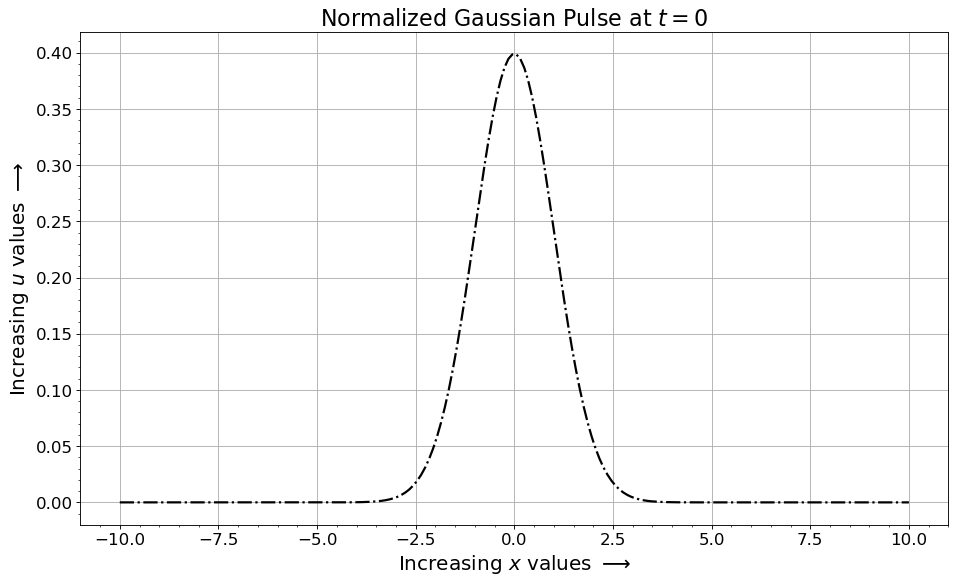

In [4]:
u_vals = np.zeros([len(t_vals),len(x_vals)])

#Normalized Gaussian Pulse at t=0
u_vals[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

plt.figure(figsize=(14,8),dpi=80)
plt.plot(x_vals,u_vals[0],lw=2,ls="-.",color='k')

plt.xticks(size=15)
plt.minorticks_on()
plt.yticks(size=15)
plt.xlabel("Increasing $x$ values $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ values $\longrightarrow$",size=18)
plt.title("Normalized Gaussian Pulse at $t=0$",size=20)
plt.grid()

$\textbf{We will now solve the advection equation for the given pulse using various}$ $\textbf{schemes and check their stabilities.}$

### $\textit{FTCS Scheme}$

In [ ]:
u_vals_ftcs = np.zeros([len(t_vals),len(x_vals)])

u_vals_ftcs[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals[0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylim(-30,30)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_ftcs[n+1,i] = u_vals_ftcs[n,i] - (C/2)*(u_vals_ftcs[n,i+1] - u_vals_ftcs[n,i-1])
    
    u_vals_ftcs[n+1,0] = u_vals_ftcs[n,-2]
    u_vals_ftcs[n+1,-1] = u_vals_ftcs[n,1]
    
    res.set_ydata(u_vals_ftcs[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()

### $\textit{Upwind Scheme}$

In [70]:
u_vals_upwind = np.zeros([len(t_vals),len(x_vals)])

u_vals_upwind[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals_upwind[0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_upwind[n+1,i] = u_vals_upwind[n,i] - (C)*(u_vals_upwind[n,i] - u_vals_upwind[n,i-1])
    
    u_vals_upwind[n+1,0] = u_vals_upwind[n,-2]
    u_vals_upwind[n+1,-1] = u_vals_upwind[n,1]
    
    res.set_ydata(u_vals_upwind[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()

### $\textit{Lax Method}$

In [71]:
u_vals_lax = np.zeros([len(t_vals),len(x_vals)])

u_vals_lax[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals_lax[0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_lax[n+1,i] = (1/2)*(u_vals_lax[n,i+1] + u_vals_lax[n,i-1]) - (C/2)*(u_vals_lax[n,i+1] - u_vals_lax[n,i-1])
    
    u_vals_lax[n+1,0] = u_vals_lax[n,-2]
    u_vals_lax[n+1,-1] = u_vals_lax[n,1]
    
    res.set_ydata(u_vals_lax[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()

### $\textit{Lax-Wendroff Method}$

In [72]:
u_vals_laxwend = np.zeros([len(t_vals),len(x_vals)])

u_vals_laxwend[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals_laxwend[0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_laxwend[n+1,i] = u_vals_laxwend[n,i] - (C/2)*(u_vals_laxwend[n,i+1] - u_vals_laxwend[n,i-1]) + ((C**2)/2)*(u_vals_laxwend[n,i+1] - 2*(u_vals_laxwend[n,i]) + u_vals_laxwend[n,i-1])
    
    u_vals_laxwend[n+1,0] = u_vals_laxwend[n,-2]
    u_vals_laxwend[n+1,-1] = u_vals_laxwend[n,1]
    
    res.set_ydata(u_vals_laxwend[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()

### $\textit{MacCormack Method}$

In [82]:
u_vals_mac = np.zeros([len(t_vals),len(x_vals)])

u_vals_mac[0,:] = (1/(sigma*np.sqrt(2*pi)))*np.exp(-(x_vals**2)/(2*(sigma**2)))

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals_mac[0])
plt.xticks(size=15)
plt.yticks(size=15)
#plt.ylim(0.38,0.41)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_tempo = u_vals_mac[n].copy()
        u_vals_tempo[i] = u_vals_mac[n,i] + C*(u_vals_mac[n,i] - u_vals_mac[n,i+1])
        u_vals_mac[n+1,i] = (1/2)*(u_vals_mac[n,i] + u_vals_tempo[i]) - (C/2)*(u_vals_tempo[i] - u_vals_tempo[i-1])
    
    u_vals_mac[n+1,0] = u_vals_mac[n,-2]
    u_vals_mac[n+1,-1] = u_vals_mac[n,1]
    
    res.set_ydata(u_vals_mac[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()

#### $\textbf{The below cell is to advect a rectangular pulse centered at } x = 0 \textbf{.}$

In [ ]:
u_vals_mac_2nd = np.zeros([len(t_vals),len(x_vals)])

for i in range(len(x_vals)):
    if -0.5<= x_vals[i] <= 0.5:
        u_vals_mac_2nd[0,i] = 2
    else:
        u_vals_mac_2nd[0,i] = 0

fig = plt.figure(figsize=(14,8),dpi=80)
res, = plt.plot(x_vals,u_vals_mac_2nd[0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Increasing Space grid points $\longrightarrow$",size=18)
plt.ylabel("Increasing $u$ Values",size=18)
plt.grid()
plt.minorticks_on()

for n in range(len(t_vals)-1):
    for i in range(1,len(x_vals)-1):
        u_vals_tempo = u_vals_mac_2nd[i].copy()
        u_vals_tempo[i] = u_vals_mac_2nd[n,i] + C*(u_vals_mac_2nd[n,i] - u_vals_mac_2nd[n,i+1])
        u_vals_mac_2nd[n+1,i] = (1/2)*(u_vals_mac_2nd[n,i] + u_vals_tempo[i]) - (C/2)*(u_vals_tempo[i] - u_vals_tempo[i-1])
    
    u_vals_mac_2nd[n+1,0] = u_vals_mac_2nd[n,-2]
    u_vals_mac_2nd[n+1,-1] = u_vals_mac_2nd[n,1]
    
    res.set_ydata(u_vals_mac_2nd[n+1])
    fig.canvas.draw()
    fig.canvas.flush_events()